In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2017, 2017)

dataSetOps.prepare()


df = dataSetOps.df

In [4]:
# variables
mavgl = 50
window = 15
epilson = 0.0001

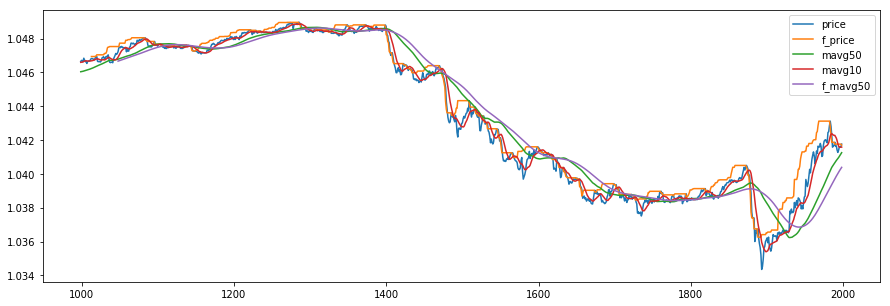

In [51]:
mavgl = str(mavgl)
df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window).rolling(window=50).mean()
df['f_price'] = df['price'].shift(-window).rolling(window=window).max()
df['value_a'] = df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson
df['value_b'] = df['f_price'] - df['price'] > epilson
df['value'] = df['value_a'] == df['value_b']
df[['price', 'f_price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()

0.7456704668838219


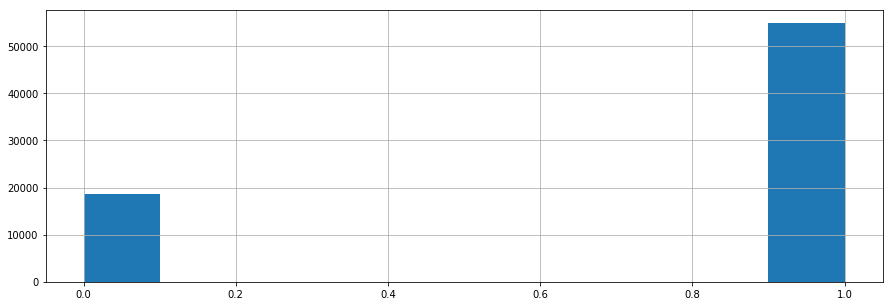

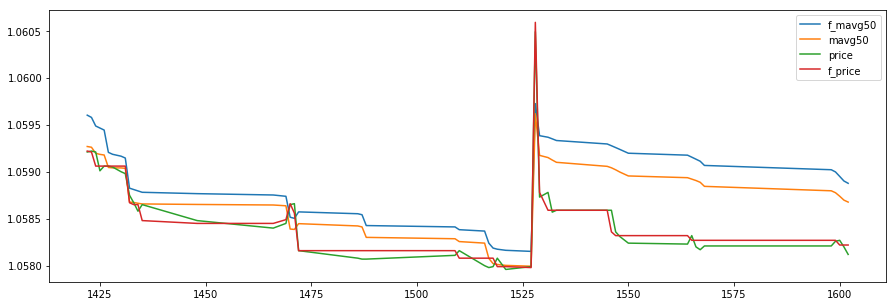

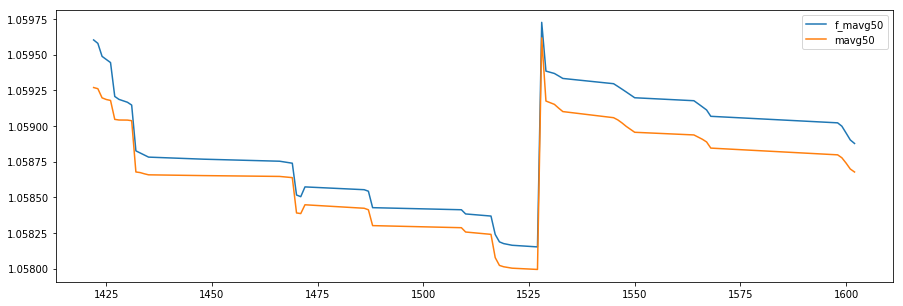

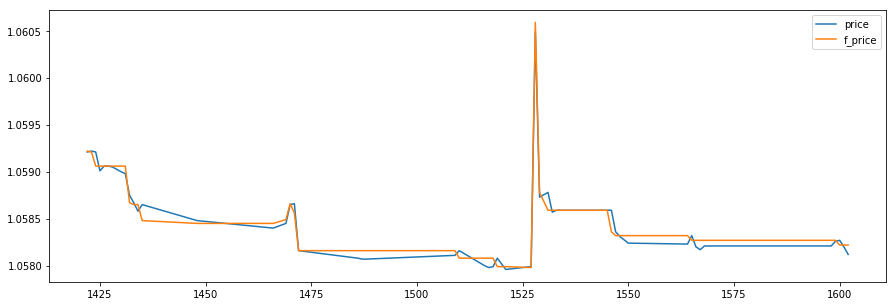

In [52]:
dfr = df[df['value_a']]
dfr['value_b'].astype(int).hist()
print(len(dfr[dfr['value_b']]) / (len(dfr)))
dfr[~dfr['value_b']][['f_mavg50','mavg50','price','f_price']].shift(-200).head(50).plot()
dfr[~dfr['value_b']][['f_mavg50','mavg50']].shift(-200).head(50).plot()
dfr[~dfr['value_b']][['price','f_price']].shift(-200).head(50).plot()